In [1]:
import pandas as pd

In [5]:
df_train = pd.read_csv('D:/data/application_train.csv')
print('The shape of application train : ', df_train.shape)
df_train.head(5)

The shape of application train :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Flag to represent when Total income is greater than Credit
df_train['INCOME_GT_CREDIT_FLAG'] = df_train['AMT_INCOME_TOTAL'] > df_train['AMT_CREDIT']

# Column to represent Credit Income Percent
df_train['CREDIT_INCOME_PERCENT'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']

# Column to represent Annuity Income percent
df_train['ANNUITY_INCOME_PERCENT'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']

# Column to represent Credit Term
df_train['CREDIT_TERM'] = df_train['AMT_CREDIT'] / df_train['AMT_ANNUITY'] 

# Column to represent Days Employed percent in his life
df_train['DAYS_EMPLOYED_PERCENT'] = df_train['DAYS_EMPLOYED'] / df_train['DAYS_BIRTH']

df_train.shape

(307511, 127)

In [19]:
df_bureau = pd.read_csv('D:/data/bureau.csv')
print('The shape of bureau : ', df_bureau.shape)
df_bureau.head(5)

The shape of bureau :  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [20]:
# Combining numerical features
grp = df_bureau.drop(['SK_ID_BUREAU'], axis = 1).groupby(by=['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
df_train_bureau = df_train.merge(grp, on='SK_ID_CURR', how='left')
df_train_bureau.update(df_train_bureau[grp.columns].fillna(0))

# Combining categorical features
df_bureau_categorical = pd.get_dummies(df_bureau.select_dtypes('object'))
df_bureau_categorical['SK_ID_CURR'] = df_bureau['SK_ID_CURR']
grp = df_bureau_categorical.groupby(by = ['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
df_train_bureau = df_train_bureau.merge(grp, on='SK_ID_CURR', how='left')
df_train_bureau.update(df_train_bureau[grp.columns].fillna(0))

df_train_bureau.shape

(307511, 162)

In [21]:
df_prev = pd.read_csv('D:/data/previous_application.csv')
print('The shape of previous application : ', df_prev.shape)
df_prev.head(5)

The shape of previous application :  (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Number of previous applications per customer
grp = df_prev[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})
df_train_bureau_prev = df_train_bureau.merge(grp, on =['SK_ID_CURR'], how = 'left')
df_train_bureau_prev['PREV_APP_COUNT'] = df_train_bureau_prev['PREV_APP_COUNT'].fillna(0)

# Combining numerical features
grp = df_prev.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
df_train_bureau_prev = df_train_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
df_train_bureau_prev.update(df_train_bureau_prev[grp.columns].fillna(0))

# Combining categorical features
prev_categorical = pd.get_dummies(df_prev.select_dtypes('object'))
prev_categorical['SK_ID_CURR'] = df_prev['SK_ID_CURR']
prev_categorical.head()
grp = prev_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
df_train_bureau_prev = df_train_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
df_train_bureau_prev.update(df_train_bureau_prev[grp.columns].fillna(0))

df_train_bureau_prev.shape

(307511, 325)

In [23]:
df_pos = pd.read_csv('D:/data/POS_CASH_balance.csv')
print('The shape of pos cash balance : ', df_pos.shape)
df_pos.head(5)

The shape of pos cash balance :  (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [24]:
# Combining numerical features
grp = df_pos.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
df_train_bureau_prev = df_train_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
df_train_bureau_prev.update(df_train_bureau_prev[grp.columns].fillna(0))

# Combining categorical features
df_pos_categorical = pd.get_dummies(df_pos.select_dtypes('object'))
df_pos_categorical['SK_ID_CURR'] = df_pos['SK_ID_CURR']

grp = df_pos_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

df_train_bureau_prev = df_train_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
df_train_bureau_prev.update(df_train_bureau_prev[grp.columns].fillna(0))

df_train_bureau_prev.shape

(307511, 339)

In [25]:
df_install = pd.read_csv('D:/data/installments_payments.csv')
print('The shape of installments payments : ', df_install.shape)
df_install.head(5)

The shape of installments payments :  (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [26]:
# Combining numerical features and there are no categorical features in this dataset
grp = df_install.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['INSTA_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
df_train_bureau_prev = df_train_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
df_train_bureau_prev.update(df_train_bureau_prev[grp.columns].fillna(0))

df_train_bureau_prev.shape

(307511, 345)

In [27]:
df_cc = pd.read_csv('D:/data/credit_card_balance.csv')
print('The shape of credit card balance : ', df_cc.shape)
df_cc.head(5)

The shape of credit card balance :  (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [28]:
# Combining numerical features
grp = df_cc.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
df_train_bureau_prev = df_train_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
df_train_bureau_prev.update(df_train_bureau_prev[grp.columns].fillna(0))

# Combining categorical features
cc_categorical = pd.get_dummies(df_cc.select_dtypes('object'))
cc_categorical['SK_ID_CURR'] = df_cc['SK_ID_CURR']

grp = cc_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

df_train_bureau_prev = df_train_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
df_train_bureau_prev.update(df_train_bureau_prev[grp.columns].fillna(0))

df_train_bureau_prev.shape

(307511, 372)

In [29]:
from sklearn.model_selection import train_test_split

X = df_train_bureau_prev.drop(['SK_ID_CURR'],axis=1)
y = df_train_bureau_prev.pop('TARGET').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (246008, 371)
Shape of X_test: (61503, 371)


In [34]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

types = np.array([dt for dt in X_train.dtypes])

all_columns = X_train.columns.values
is_num = types != 'object'

num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

#Missing value for numeric data
imputer_num = SimpleImputer(strategy='median')
X_train_num = imputer_num.fit_transform(X_train[num_cols])
X_test_num = imputer_num.transform(X_test[num_cols])

scaler_num = StandardScaler()
X_train_num1 = scaler_num.fit_transform(X_train_num)
X_test_num1 = scaler_num.transform(X_test_num)

X_train_num_final = pd.DataFrame(X_train_num1, columns=num_cols)
X_test_num_final = pd.DataFrame(X_test_num1, columns=num_cols)

#Missing value for categorical data
imputer_cat = SimpleImputer(strategy='constant', fill_value='MISSING')
X_train_cat = imputer_cat.fit_transform(X_train[cat_cols])
X_test_cat = imputer_cat.transform(X_test[cat_cols])

X_train_cat1= pd.DataFrame(X_train_cat, columns=cat_cols)
X_test_cat1= pd.DataFrame(X_test_cat, columns=cat_cols)

ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat2 = ohe.fit_transform(X_train_cat1)
X_test_cat2 = ohe.transform(X_test_cat1)

cat_cols_ohe = list(ohe.get_feature_names(input_features=cat_cols))

X_train_cat_final = pd.DataFrame(X_train_cat2, columns = cat_cols_ohe)
X_test_cat_final = pd.DataFrame(X_test_cat2, columns = cat_cols_ohe)

#Final data
X_train_final = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)
X_test_final = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)

In [35]:
print(X_train_final.shape)
print(X_test_final.shape)

(246008, 501)
(61503, 501)


In [36]:
X_train_final.to_csv('X_train_final.csv')
X_test_final.to_csv('X_test_final.csv')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#Initialize parameters
param = {'penalty':['l1','l2'],
        'C':[0.1,0.001,0.0001,0.00001]}

#Find best param using grid search
log_reg = LogisticRegression()
clf = GridSearchCV(log_reg,param_grid=param,n_jobs=-1,verbose=1)
clf.fit(X_train_final,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.001, 0.0001, 1e-05],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [40]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [47]:
#Fit model with best param
log_reg = LogisticRegression(C=0.1,penalty='l2')
log_reg.fit(X_train_final,y_train)

### predict on test data
y_pred = log_reg.predict_proba(X_test_final)[:,1]

### calculate auroc score
score = roc_auc_score(y_test,y_pred)
print(score)

1.0


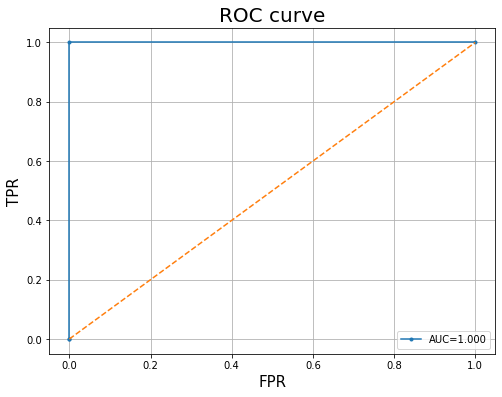

In [43]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()